<a href="https://colab.research.google.com/github/Bia-byte/Exercicio-1/blob/main/Exercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilidade de X >= 3 (simulada) = 0.5757


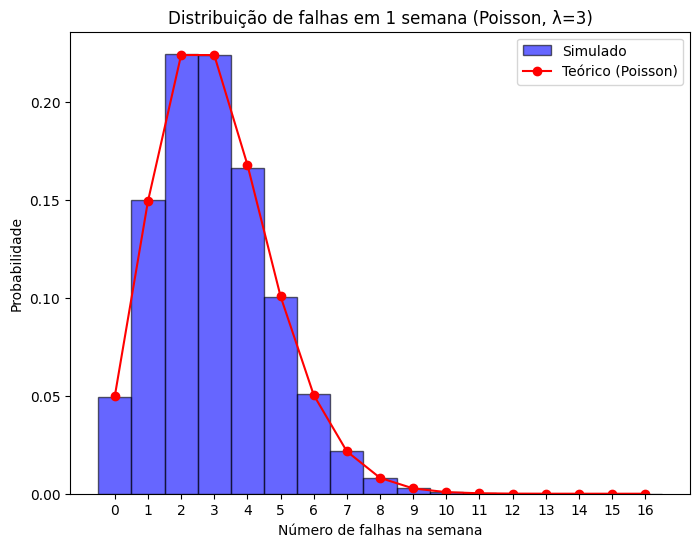

In [8]:
# Exercício 4

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

lambda1 = 3    # Número médio de requisições (taxa Poisson)
N = 100000     # Número de amostras (simulações)
value = 3      # Queremos a probabilidade de X >= 3
count = 0
av = np.array([])

# Gera N valores uniformes no intervalo [0,1]
x = np.random.uniform(0, 1, N)

for ix in x:
    i = 0
    # Probabilidade de X=0
    pr = np.exp(-lambda1)
    # Soma cumulativa
    F = pr

    # Método de inversão
    while ix >= F:
        # Atualiza a probabilidade p(X=i+1)
        pr = (lambda1 / (i + 1)) * pr
        F += pr
        i += 1

    # 'i' é o valor de X gerado
    av = np.append(av, i)

# Conta quantos valores foram <= value (no máximo 2)
for expvalue in av:
    if expvalue >= value:
        count += 1

# Probabilidade simulada
prob = count / N
print(f"Probabilidade de X >= 3 (simulada) = {prob:.4f}")

# Histograma dos valores simulados
plt.figure(figsize=(8,6))
bins = np.arange(0, np.max(av) + 1.5) - 0.5
plt.hist(av, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black', label="Simulado")

# Valores teóricos da distribuição de Poisson
x_teorico = np.arange(0, np.max(av) + 1)
poisson_teorico = stats.poisson.pmf(x_teorico, lambda1)
plt.plot(x_teorico, poisson_teorico, 'ro-', markersize=6, label="Teórico (Poisson)")

# Configuração dos eixos e título
plt.title('Distribuição de falhas em 1 semana (Poisson, λ=3)')
plt.xlabel('Número de falhas na semana')
plt.ylabel('Probabilidade')
plt.xticks(x_teorico)
plt.legend()
plt.show()

